## Using Monte Carlo Control

### Part 1: Implementation of Easy21

State s is the tuple (top, sum), action a is 0 for hit and 1 for stick. 

In [32]:
import random, numpy as np

In [33]:
def draw_card():
    value = random.randint(1, 10)
    colour_value = random.random()
    if colour_value < 0.33:
        return -value
    else:
        return value

In [34]:
def step(s, a): # s is the state (top card of dealer, total sum of cards of player) of the game, a is the action (hit or stick), shoud sample a next state s' and reward r.
    if a == 0: # hit
        if s[1] < 21:
            card_value = draw_card() # should return appropriate value of card with correct sign (black -> add, red -> subtract)
            s_new = (abs(card_value), s[1] + card_value)
            if s_new[1] > 21 or s_new[1]< 1 : # player busts
                return s_new, -1
            else:
                return s_new, 0
        else:
            return s, -1
    else: # stick
        dealer_card = draw_card()
        while dealer_card < 17: # dealer hits until the sum is at least 17
            dealer_card += draw_card()
        if dealer_card > 21: # dealer busts
            return s, 1
        elif dealer_card < s[1]: # player wins
            return s, 1
        elif dealer_card == s[1]: # draw
            return s, 0
        else: # dealer wins
            return s, -1

# What is the exact meaning of the "top card of the dealer"?, we are not updating that anywhere in the game, so not sure why it is needed.


### Step 2: Monte Carlo Control Implementation

In [35]:
# Initialize the value function, count of states, epsilon, N_0, and alpha.
N = np.zeros((11, 22, 2)) # x -> top card, y -> sum of player, z -> action
V = np.zeros((11, 22, 2)) # x -> top card, y -> sum of player, z -> action
N0 = 100

number_of_episodes = 1000000

for episode in range(number_of_episodes):
    player_value = random.randint(1, 10)
    dealer_value = random.randint(1, 10)
    s = (dealer_value, player_value)
    a = 0 if random.random() < 0.5 else 1 # choose first action randomly

    while True:
        s_new, r = step(s, a)
        if s_new[1] >= 1 and s_new[1] <= 21:
            N[s_new[0], s_new[1], a] += 1
            alpha_t = 1 / N[s_new[0], s_new[1], a]
            V[s_new[0], s_new[1], a] += alpha_t * (r + np.max(V[s_new[0], :, :]) - V[s_new[0], s_new[1], a]) # update value function (max expected reward - curent value) -> Exery visit Monte Carlo

        if r != 0:
            break

        s = s_new
        epsilon_t = N0 / (N0 + N[s[0], s[1], a])
        a = np.argmax(V[s[0], s[1], :]) if random.random() > epsilon_t else random.randint(0, 1) # choose next action using epsilon-greedy policy


In [36]:
print("Value function for Easy21:"
      "\nHit Action:\n", V[:, :, 0],
      "\nStick Action:\n", V[:, :, 1])

Value function for Easy21:
Hit Action:
 [[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         10.4425515  10.45383767 10.46037859 10.45805796 10.45963219
  10.46222848 10.46025107 10.47154195 10.45771867 10.47073018 10.46943879
  10.4804451  10.49437728 10.50044532 10.50116152 10.49528561 10.49557492
  10.47080676 10.4283503   9.9233866   9.65784291]
 [ 0.         12.22799295 12.21791615 12.21626756 12.230383   12.23550729
  12.22585624 12.23234939 12.24072853 12.23935974 12.24926806 12.22736814
  12.23446008 12.27498994 12.26371106 12.28313304 12.2656216  12.26083166
  12.25953502 12.28770319 12.19504497 10.94447484]
 [ 0.         11.16853712 11.16311899 11.14498955 11.16200442 11.16882704
  11.15332526 11.16345773 11.17266414 11.17771506 11.18574228 11.17997599
  11.17420909 11.

In [37]:
Z_0 = np.transpose(V[:, :, 0])
Z_1 = np.transpose(V[:, :, 1])
Z = np.maximum(Z_0, Z_1)
optimal_policy = np.argmax(V, axis=2)

In [38]:
print("\nOptimal Value Function:\n", Z)
print("\nOptimal Policy (0: Hit, 1: Stick):\n", optimal_policy)


Optimal Value Function:
 [[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.         10.4425515  12.22799295 11.16853712 12.1156818  12.5982107
  12.50921776 15.68384135 14.64512081 11.17032602 13.09361803]
 [ 0.         10.45383767 12.21791615 11.16311899 12.0945699  12.62173435
  12.48161171 15.691292   14.64659646 11.20490503 13.06015252]
 [ 0.         10.46037859 12.21626756 11.14498955 12.10630959 12.64706702
  12.48653005 15.68143149 14.69388853 11.25505128 13.06738448]
 [ 0.         10.45805796 12.230383   11.16200442 12.103812   12.6237479
  12.47754088 15.68477701 14.71429114 11.19032581 13.07494204]
 [ 0.         10.45963219 12.23550729 11.16882704 12.11953865 12.62066472
  12.51393006 15.70205945 14.70904286 11.23626398 13.14478629]
 [ 0.         10.46222848 12.22585624 11.15332526 12.10956577 12.63729055
  12.51026977 15.70073069 14.71172561 11.21451777 13.06878011]
 [ 0.         10.46025107

### Plotting the value function

In [39]:
import matplotlib.pyplot as plt

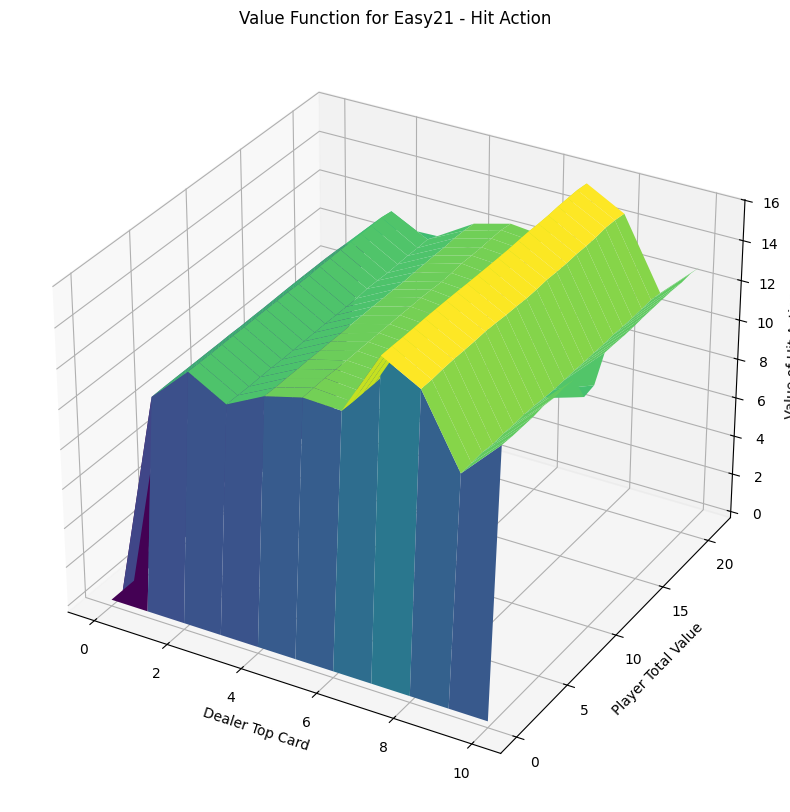

In [40]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(0, 11), np.arange(0, 22))
ax.plot_surface(X, Y, Z_0, cmap='viridis')
ax.set_xlabel('Dealer Top Card')
ax.set_ylabel('Player Total Value')
ax.set_zlabel('Value of Hit Action')
ax.set_title('Value Function for Easy21 - Hit Action')
plt.show()

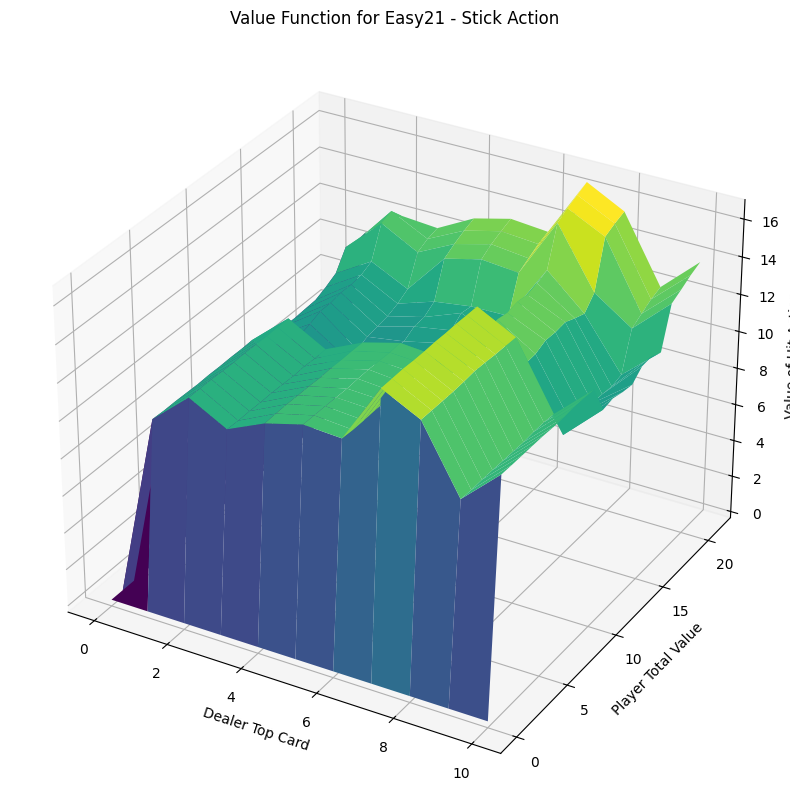

In [41]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_1, cmap='viridis')
ax.set_xlabel('Dealer Top Card')
ax.set_ylabel('Player Total Value')
ax.set_zlabel('Value of Hit Action')
ax.set_title('Value Function for Easy21 - Stick Action')
plt.show()

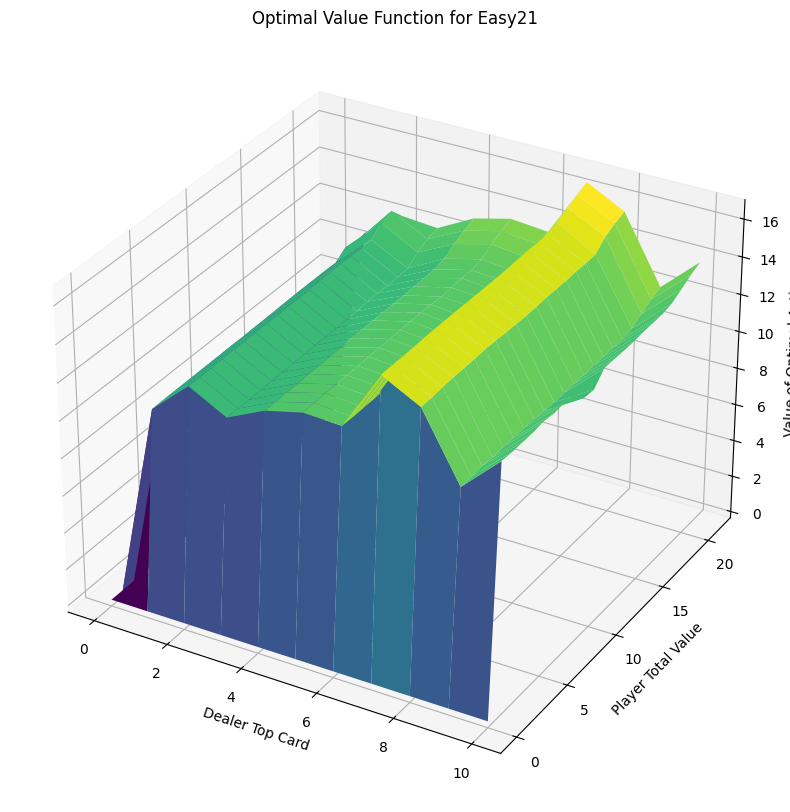

In [42]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Dealer Top Card')
ax.set_ylabel('Player Total Value')
ax.set_zlabel('Value of Optimal Action')
ax.set_title('Optimal Value Function for Easy21')
plt.show()

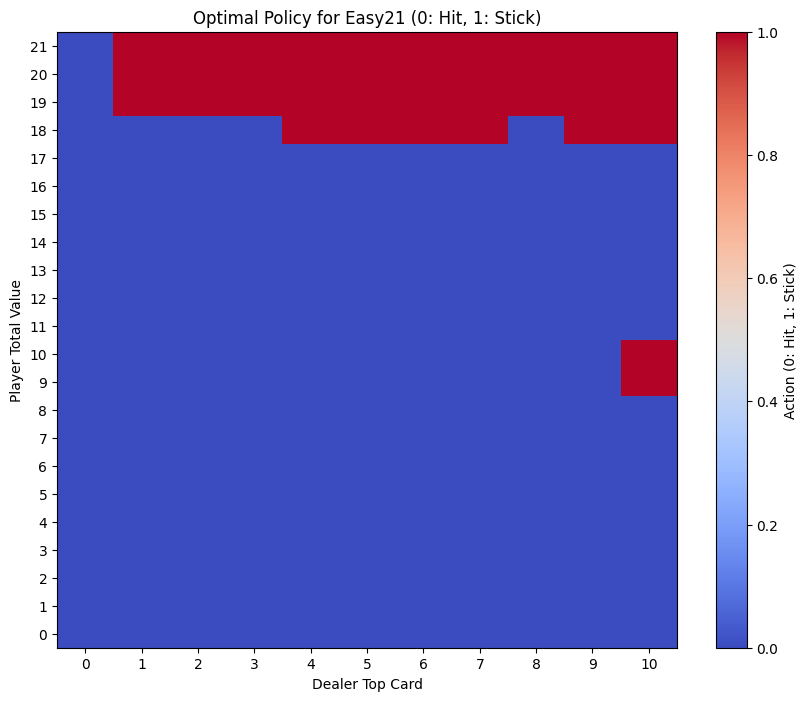

In [43]:
plt.figure(figsize=(10, 8))
plt.imshow(optimal_policy.T, origin='lower', aspect='auto', cmap='coolwarm')
plt.colorbar(label='Action (0: Hit, 1: Stick)')
plt.xlabel('Dealer Top Card')
plt.ylabel('Player Total Value')
plt.title('Optimal Policy for Easy21 (0: Hit, 1: Stick)')
plt.xticks(ticks=np.arange(optimal_policy.shape[0]), labels=np.arange(optimal_policy.shape[0]))
plt.yticks(ticks=np.arange(optimal_policy.shape[1]), labels=np.arange(optimal_policy.shape[1]))
plt.show()